# Portfolio Prüfung I WWI2022B
Bitte bearbeiten Sie alle Aufgaben direkt  hier im Notebook und geben Sie die .ipynb-Datei am Ende der Portfolio-Prüfung [hier](https://privacy.dhbw-stuttgart.de/wwi2022b.html) ab.
Für Aufgaben die ohne Code erstellt werden, steht nach der Aufgabenstellung ein Markdown Antwortfeld zur Verfügung. 
Für Aufgaben bei denen ein Code verlangt wird, befindet sich nach der Aufgabenstellung ein interaktives Code-Feld (ggf. mit schon vorab ausgefüllten Code-Fragementen).

Viel Erfolg 

## Aufgabe 1 Python Basics

### a) Bildschirmausgaben
Ersetzen Sie unten in der Variable `myNumber` die Zahl 12345678 durch Ihre Matrikelnummer. Geben Sie anschließend den Inhalt der LIste myList einmal normal, einmal rückwärts und einmal nur jedes zweite Zeichen am Ende der Codezeile aus. 
Beispielausgabe:
```
MatrikelNummer:  ['1', '2', '3', '4', '5', '6', '7', '8', '9']
Rückwärts:  ['9', '8', '7', '6', '5', '4', '3', '2', '1']
Jedes zweite Zeichen:  ['1', '3', '5', '7', '9']
```

In [1]:
# insert code for print here:
myNumber ='123456789'
myList = list(myNumber)
print("MatrikelNummer: ", myList)
print("Rückwärts: ", myList[::-1])
print("Jedes zweite Zeichen: ", myList[::2])

MatrikelNummer:  ['1', '2', '3', '4', '5', '6', '7', '8', '9']
Rückwärts:  ['9', '8', '7', '6', '5', '4', '3', '2', '1']
Jedes zweite Zeichen:  ['1', '3', '5', '7', '9']


### b) Erzeugen von Grafiken
Erzeugen Sie eine Grafik welche die Unterschiede von Komplexitätsgraden von Algorithmen veranschaulicht. Auf der x-Achse sollte $n$ abgebildet sein, auf der y-Achse die Funktionen $f(x), g(x), h(x), i(x)$, wobei gilt $f(x) = O(n), g(x) = O(n^2), h(x)= O(log x), i(x) = O(x log x)$.

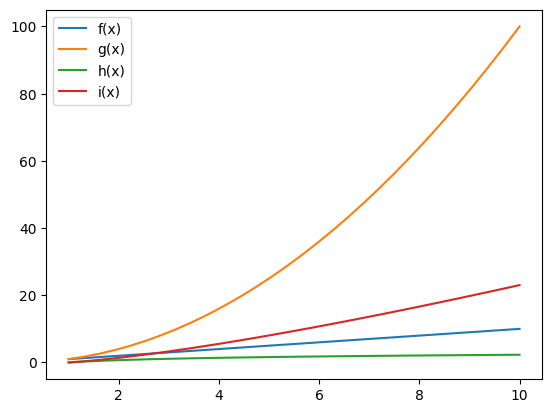

In [3]:
import matplotlib.pyplot as plt
import numpy as np #includes log-function np.log(x)

x = np.linspace(1, 10,30)

# generate the function values
fx = x
gx = x*x 
hx = np.log(x)
ix = x * np.log(x)

# Plotting
plt.plot(x,fx)
plt.plot(x,gx)
plt.plot(x,hx)
plt.plot(x,ix)
plt.legend(['f(x)','g(x)','h(x)','i(x)']) # add other functions


## Aufgabe 2 Komplexität von Algorithmen
### a) Schätzen von Aufwand
Geben Sie für die folgenden Funktionen `(funktion1, funktion2, funktion3)` jeweils in der Markdwon-Zeile darunter den Aufwand in der Big-O / Landau-Notation an.

In [4]:
def funktion1(n):
    retValue = 0
    for i in range(n,0,-1):
        retValue += i
    return retValue

Der Aufwand für `funktion1` beträgt $O(n)$.

In [5]:
def funktion2(n):
    lst = []
    for i in range(n*n):  
        lst.append(i)
        lst[i%n] += i
    return lst 

Der Aufwand für `funktion2` beträgt $O(n^2)$.

In [6]:
def funktion3(n):
    lst = []
    for i in range(100):
       lst.append(i)
       for j in range(1,100,n):
          lst[i] = j
    return lst

Der Aufwand für `funktion3`beträgt $O(1)$.

## Aufgabe 3 Implementieren einer Array-List
In der Vorlesung wurde eine Array-Backed-List vorgestellt. Unten steht der beinahe vollständige Code für diesen Datentyp. Führen Sie diesen einmal aus, bevor Sie sich an die Teilaufgaben machen.


In [1]:
# run one time

# Array Backed List
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value):
        if self.size == len(self.data): # if the backing array is full
            ndata = np.empty(len(self.data)*2, dtype=object) # create a new one with double the capacity
            for i in range(len(self.data)): # copy elements over
                ndata[i] = self.data[i]
            self.data = ndata # replace our backing store with the new array
            
        self.data[self.size] = value
        self.size += 1

    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        return self.data[idx]     

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        for i in range(idx, self.size-1):
            self.data[i] = self.data[i+1]
        self.size -= 1
           
    def __repr__(self):
        """Supports inspection"""
        return '[' + ','.join(repr(self.data[i]) for i in range(self.size)) + ']'

### a) Definition vervollständigen
Ergänzen Sie in der Implementierung die Methoden `setitem` und `len`.

In [2]:
# add the missing code in method setitem and method len:

class ArrayList (ArrayList):
    def __setitem__(self,idx,value):
        """Implements `x = self[idx]`"""
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0:
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError('list index out of range')
        self.data[idx] = value
        

    def __len__(self):
        """Should return the number of elements in the ArrayList"""
        return self.size
        
        
             

In [3]:
# you can check your code with the following statements:
myList = ArrayList()
for i in range(10):
    myList.append(i)
    
myList[0] = 9
myList[9] = 0


assert myList[0] == 9
assert myList[9] == 0
assert len(myList) == 10

# if everything is fine, no output should be created, otherwise an assertion error should be raised

### b) Sortieren
Vervollständigen Sie den unten stehenden Code, so dass die Klasse `ArrayList` eine Funktionalität zum Sortieren mittels der Insertion_Sort Methode erhält.

In [4]:
class ArrayList (ArrayList):
    def sort(self):
        # Implements insertion sort ( in ascending order) on
        # the contents of the list
        for i in range(1,len(self)):
            for j in range(i,0,-1):
                if self.data[j- 1] > self.data[j]:
                    self.data[j-1], self.data[j] = self.data[j], self.data[j-1]
                


In [5]:
# check your sort method with the following code
toSortList = ArrayList()
values = [5,3,2,1,4]
for i in values:
    toSortList.append(i)
print("unsorted: " + repr(toSortList))
toSortList.sort()
print("sorted:   " + repr(toSortList)) # should be [1,2,3,4,5]

unsorted: [5,3,2,1,4]
sorted:   [1,2,3,4,5]


Gestalten Sie zusätzlich ein Sortier-Experiment, welches zeigt, dass der Aufwand beim Insertion Sort im schlechtesten Fall $O(n^2)$ ist:

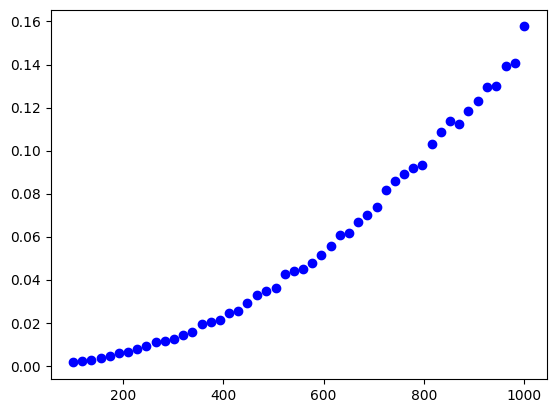

In [12]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

def mySetup(lst, n): 
    # funtion for the timeit setup
    # should fill the ArrayList lst with a number of n unsorted values
    for i in range(n,0,-1):
       lst.append(i)

ns = np.linspace(100, 1000, 50, dtype=int)
ts1 = [timeit.timeit(stmt='lst.sort()', 
                     setup= f'lst = ArrayList(); mySetup(lst,{n})',
                     globals=globals(), 
                     number=3)
       for n in ns]


plt.plot(ns, ts1, 'ob')


### c) Teile löschen
Implementieren Sie eine Methode `truncate`, welche alle Elementen außer denen zwischen einem vorgegebenen `start`-Index (inklusive) und `stop`-Index (exklusive), löscht. 

Beispiel: Gegeben sei die Liste mit den Einträgen `myList = [a, b, c, d, e, f, g, h]`. Wendet man auf diese den Befehl `myList.truncate(2,6)`, so ergibt sich `[c, d, e, f]`.

Gehen Sie davon aus, dass `start` und `stop` gültige Indizes der Liste sind. 

In [13]:
class ArrayList(ArrayList):
    def truncate(self, startIndex, endIndex):
        newList = ArrayList()
        for i in range(startIndex,endIndex,1):
            newList.append(self.data[i])
        self.data = newList.data
        self.size = newList.size


In [14]:
myList = ArrayList()
values = ['a','b','c','d','e','f','g','h']
for c in values:
    myList.append(c)
print(myList) # prints ['a','b','c','d','e','f','g','h']
myList.truncate(2,6)
print(myList) # should print ['c','d','e','f']

['a','b','c','d','e','f','g','h']
['c','d','e','f']
